# 1. Data Description

- 1.1 해당 데이터 선정 이유
- 1.2 문제제기 방향
- 1.3 분석 목표

---


> ## 1.1 해당 데이터 선정 이유
- 데이터 분석가로 거듭나기 위한 선상에 있는 청중들을 대상으로 커리어코칭을 한다는 설정 하 \
  데이터직종의 이직트렌드를 소개하기 적합하단 판단으로 데이터 선정 \
  
> - 대한민국에서의 데이터직군의 역사는 길지 않아 데이터 또한 많지 않았기에, \
데이터 산업의 근간이었던 미국의 데이터를 선정

  







> ## 1.2 문제제기 방향
- 대한민국의 IT업계는 특정 지역에서 상대적으로 발달된 현상을 띄는데, 미국 데이터산업에서도 동일한 성향이 \
드러나는지 분석한다. \

> - IT 직군에서의 이직은 도메인지식을 얻기 전까지는 빈번한 편에 속한다고 하는데, 단순 카더라가 아닌,\
  데이터적으로도 근속연차에 따라 이직률의 차이가 있는지 분석한다.

> - 이외에도 전공여부, 최종학위 등에 따라 이직성향이 있는가를 확인한다.






> ## 1.3 분석 목표
- 데이터 직군 종사자들의 이직성향을 파악하여 예비 데이터직군 종사자들에게 시사한다.





In [1]:
# @title
# %%capture
# import sys

# if 'google.colab' in sys.modules:
#     # Install packages in Colab
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pandas-profiling==2.*
#     !pip install pdpbox
#     !pip install shap

In [2]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from pdpbox import pdp
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Data Exploration

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ㅁtrain_raw = pd.read_csv('/content/drive/MyDrive/bootcamp_project/HR Analytics/aug_train.csv')

In [98]:
train = train_raw
train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [6]:
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Exploratory Data Analysis_(EDA)






> ## 3.1 Feature Engineering



---

In [7]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64



>> ### 3.1_1 Enrollee_id

---












In [8]:
train.enrollee_id.value_counts().max()
# 중복값이 없음을 확인

1

In [9]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열
train = train.sort_values('enrollee_id')

In [10]:
# enrollee_id를 index로 지정 완료
train = train.set_index('enrollee_id')
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0
2,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0
4,city_103,0.920,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
5,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
7,city_136,0.897,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0


>> ### 3.1_2 City, City_development Wrangling


---




In [11]:
# city column은 city_code형태로 되어있으며, 이는 도시를 code화 시킨 고유값임을 알 수 있음. / 오탈자가 없어 따로 핸들링하지 않음
train.city.unique()

array(['city_103', 'city_67', 'city_136', 'city_16', 'city_114',
       'city_21', 'city_23', 'city_73', 'city_104', 'city_10', 'city_100',
       'city_46', 'city_105', 'city_97', 'city_74', 'city_61', 'city_57',
       'city_160', 'city_65', 'city_45', 'city_72', 'city_41', 'city_44',
       'city_40', 'city_131', 'city_98', 'city_115', 'city_118',
       'city_71', 'city_20', 'city_159', 'city_173', 'city_64', 'city_28',
       'city_102', 'city_84', 'city_101', 'city_11', 'city_27', 'city_36',
       'city_50', 'city_13', 'city_144', 'city_91', 'city_145',
       'city_165', 'city_134', 'city_152', 'city_24', 'city_162',
       'city_39', 'city_37', 'city_1', 'city_106', 'city_83', 'city_150',
       'city_99', 'city_80', 'city_142', 'city_33', 'city_138', 'city_75',
       'city_53', 'city_128', 'city_9', 'city_30', 'city_12', 'city_141',
       'city_116', 'city_157', 'city_175', 'city_25', 'city_149',
       'city_123', 'city_19', 'city_76', 'city_89', 'city_143', 'city_70',
   

In [12]:
# city_development_index의 최소, 최대값을 확인하고, 이에따라 0.1단위로 등급을 부여
print(train.city_development_index.max())
print(train.city_development_index.min())

0.949
0.448


In [13]:
bins = np.arange(0.4, 1.1, 0.1)

In [14]:
bins_label = [str(round(x,1))+"< x <"+str(round(x+0.1,1)) for x in bins]

In [15]:
train["city_level"] = pd.cut(train["city_development_index"], bins, right=False, labels=bins_label[:-1])

In [16]:
train.city_level.unique()

['0.9< x <1.0', '0.8< x <0.9', '0.6< x <0.7', '0.7< x <0.8', '0.5< x <0.6', '0.4< x <0.5']
Categories (6, object): ['0.4< x <0.5' < '0.5< x <0.6' < '0.6< x <0.7' < '0.7< x <0.8' < '0.8< x <0.9' <
                         '0.9< x <1.0']

In [17]:
# Wrangling으로 city_level을 생성 했으니, 이에 사용한 feature 삭제
train = train.drop(["city", "city_development_index"], axis = 1)

In [18]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_level
enrollee_id,,,,,,,,,,,,
1,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0,0.9< x <1.0
2,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0,0.9< x <1.0
4,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0,0.9< x <1.0
5,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0,0.8< x <0.9
7,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0,0.8< x <0.9



>> ### 3.1_3 Gender

---

In [19]:
train.gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [20]:
train.gender = train.gender.fillna(value = 'No Data')
train.gender.unique()

array(['Male', 'Female', 'No Data', 'Other'], dtype=object)

>> ### 3.1_4 Relevent_Experience
---

In [21]:
# 사실상 boolean으로, T,F로 분류
train.relevent_experience.unique()

array(['No relevent experience', 'Has relevent experience'], dtype=object)

In [22]:
train.relevent_experience = train.relevent_experience.replace("No relevent experience", 'F')
train.relevent_experience = train.relevent_experience.replace("Has relevent experience", 'T')
train.relevent_experience.unique()

array(['F', 'T'], dtype=object)

>> ### 3.1_5 Enrolled_University

---

In [23]:
train.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [24]:
train.enrolled_university = train.enrolled_university.replace("no_enrollment", "Not applicable")
train.enrolled_university = train.enrolled_university.fillna(value = 'No Data')
train.enrolled_university.unique()

array(['Not applicable', 'Full time course', 'Part time course',
       'No Data'], dtype=object)

>> ### 3.1_6 Education_Level

---



In [25]:
train.education_level.unique()

array(['High School', 'Phd', 'Masters', 'Graduate', 'Primary School', nan],
      dtype=object)

In [26]:
train.education_level = train.education_level.fillna(value = 'No Data')
train.education_level.unique()

array(['High School', 'Phd', 'Masters', 'Graduate', 'Primary School',
       'No Data'], dtype=object)

>> ### 3.1_7 Major_Discipline

---

In [27]:
train.major_discipline.unique()

array([nan, 'STEM', 'Humanities', 'Business Degree', 'Other', 'Arts',
       'No Major'], dtype=object)

In [28]:
train.major_discipline = train.major_discipline.fillna(value = 'No Data')
train.major_discipline.unique()

array(['No Data', 'STEM', 'Humanities', 'Business Degree', 'Other',
       'Arts', 'No Major'], dtype=object)

>> ### 3.1_8 Experience
---

In [29]:
train.experience.unique()

array(['2', '15', '9', '10', '13', '>20', '11', '5', '7', '8', '4', '3',
       '6', '14', '12', '1', '16', '19', '17', '18', '20', '<1', nan],
      dtype=object)

In [30]:
train.company_size = train.company_size.replace(">20", "20<")
train.experience = train.experience.fillna(value = 'No Data')
train.experience.unique()

array(['2', '15', '9', '10', '13', '>20', '11', '5', '7', '8', '4', '3',
       '6', '14', '12', '1', '16', '19', '17', '18', '20', '<1',
       'No Data'], dtype=object)

>> ### 3.1_9 Company_Size

---

In [31]:
train.company_size.unique()

array([nan, '10000+', '50-99', '<10', '100-500', '1000-4999', '5000-9999',
       '10/49', '500-999'], dtype=object)

In [32]:
train.company_size = train.company_size.replace("10/49", "10-49")
train.company_size = train.company_size.replace("10000+", "10000<")
train.company_size = train.company_size.fillna(value = 'No Data')
train.company_size.unique()

array(['No Data', '10000<', '50-99', '<10', '100-500', '1000-4999',
       '5000-9999', '10-49', '500-999'], dtype=object)

>> ### 3.1_10 Company_Type
---

In [33]:
train.company_type.unique()

array(['Pvt Ltd', 'NGO', 'Public Sector', 'Early Stage Startup', nan,
       'Funded Startup', 'Other'], dtype=object)

In [34]:
train.company_type = train.company_type.fillna(value = 'No Data')
train.company_type.unique()

array(['Pvt Ltd', 'NGO', 'Public Sector', 'Early Stage Startup',
       'No Data', 'Funded Startup', 'Other'], dtype=object)

>> ### 3.1_11 Last_New_Job

---

In [35]:
train.last_new_job.unique()

array(['never', '3', '>4', '1', '2', '4', nan], dtype=object)

In [36]:
train.last_new_job = train.last_new_job.fillna(value = 'No Data')
train.last_new_job.unique()

array(['never', '3', '>4', '1', '2', '4', 'No Data'], dtype=object)

>> ### 3.1_12 Final Confirmation

---

In [37]:
# 데이터수의 변화가 없음을 확인
train.shape

(19158, 12)

In [38]:
# column순서 변경
train=train[['city_level','gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target']]
train.head()

,city_level,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,
1,0.9< x <1.0,Male,F,Not applicable,High School,No Data,2,No Data,Pvt Ltd,never,150,0.0
2,0.9< x <1.0,Male,F,Not applicable,Phd,STEM,15,10000<,NGO,3,128,1.0
4,0.9< x <1.0,Male,F,Not applicable,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
5,0.8< x <0.9,Male,T,Not applicable,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
7,0.8< x <0.9,Male,T,Full time course,Masters,STEM,13,No Data,No Data,1,18,0.0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 1 to 33380
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city_level           19158 non-null  category
 1   gender               19158 non-null  object  
 2   relevent_experience  19158 non-null  object  
 3   enrolled_university  19158 non-null  object  
 4   education_level      19158 non-null  object  
 5   major_discipline     19158 non-null  object  
 6   experience           19158 non-null  object  
 7   company_size         19158 non-null  object  
 8   company_type         19158 non-null  object  
 9   last_new_job         19158 non-null  object  
 10  training_hours       19158 non-null  int64   
 11  target               19158 non-null  float64 
dtypes: category(1), float64(1), int64(1), object(9)
memory usage: 1.8+ MB




> ## 3.2 Encoding

---







> ### 3.2_1 Model performance after only Encoding(before SMOTE)

---





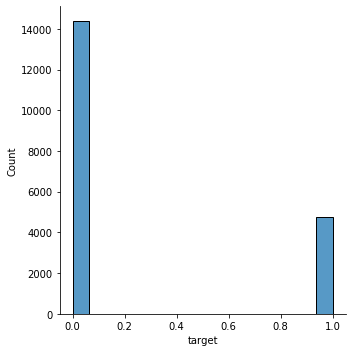

In [40]:
sns.displot(train.target)

In [41]:
target = 'target'
feature = train.drop([target], axis = 1).columns

In [42]:
train_base, test_base = train_test_split(train, train_size = 0.8, test_size = 0.2,
                              stratify = train[target], random_state = 2)

In [43]:
X_train = train_base[feature]
y_train = train_base[target]
X_test = test_base[feature]
y_test = test_base[target]

In [44]:
le = preprocessing.LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [45]:
model = XGBClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=7,
    learning_rate=0.1,
    n_jobs=-1
)

In [46]:
eval_set = [(X_train, y_train), 
            (X_test, y_test)]

In [47]:
model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50
         )

[0]	validation_0-error:0.2178	validation_1-error:0.240344
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.214733	validation_1-error:0.237735
[2]	validation_0-error:0.211797	validation_1-error:0.237213
[3]	validation_0-error:0.21134	validation_1-error:0.23095
[4]	validation_0-error:0.210427	validation_1-error:0.227818
[5]	validation_0-error:0.210622	validation_1-error:0.231472
[6]	validation_0-error:0.207491	validation_1-error:0.22834
[7]	validation_0-error:0.208078	validation_1-error:0.229645
[8]	validation_0-error:0.208078	validation_1-error:0.229123
[9]	validation_0-error:0.206381	validation_1-error:0.229123
[10]	validation_0-error:0.206577	validation_1-error:0.230167
[11]	validation_0-error:0.202988	validation_1-error:0.227296
[12]	validation_0-error:0.202401	validation_1-error:0.228079
[13]	validation_0-error:0.201161	validation_1-error:0.227557


XGBClassifier(max_depth=7, n_estimators=200, n_jobs=-1, random_state=42)

In [48]:
y_test_pred = model.predict(X_test)
print("score:",model.score(X_test,y_test))
print("F1_score:",f1_score(y_test, y_test_pred))

score: 0.7792275574112735
F1_score: 0.4897466827503016


In [49]:
train.head()

,city_level,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,
1,0.9< x <1.0,Male,F,Not applicable,High School,No Data,2,No Data,Pvt Ltd,never,150,0.0
2,0.9< x <1.0,Male,F,Not applicable,Phd,STEM,15,10000<,NGO,3,128,1.0
4,0.9< x <1.0,Male,F,Not applicable,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
5,0.8< x <0.9,Male,T,Not applicable,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
7,0.8< x <0.9,Male,T,Full time course,Masters,STEM,13,No Data,No Data,1,18,0.0




> ## 3.3 Data Balancing

---





In [50]:
train_enc = train.apply(le.fit_transform)

In [51]:
train_enc.head()

,city_level,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,
1,5,1,0,2,1,3,11,8,6,6,146,0
2,5,1,0,2,4,6,6,3,2,2,125,1
4,5,1,0,2,2,6,19,4,5,4,12,0
5,4,1,1,2,2,6,1,7,0,0,11,0
7,4,1,1,0,2,6,4,8,3,0,17,0


In [52]:
X_train_enc = train_enc[feature]
y_train_enc = train_enc[target]

In [53]:
feature, target = SMOTE(random_state = 42).fit_resample(X_train_enc, y_train_enc)

In [54]:
feature.shape # After SMOTE

(28762, 11)

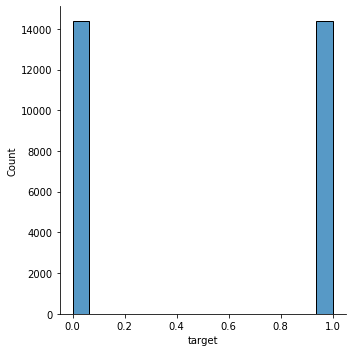

In [55]:
sns.displot(target)

#4. Modeling


---





> ## 4.1 Baseline Model Select










In [56]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,
                                                    stratify=target, random_state = 42)

> > ### 4.1_1 RandomForest Model

---



In [57]:
model1 = RandomForestClassifier(random_state = 42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_test_pred = model1.predict(X_test)
print("model1_score:",model1.score(X_test,y_test))
print("model1_F1_score:",f1_score(y_test, y_test_pred))
print('model1_AUC score:',roc_auc_score(y_test, y_test_pred))

model1_score: 0.8195723970102555
model1_F1_score: 0.8221993833504624
model1_AUC score: 0.8195749899809674


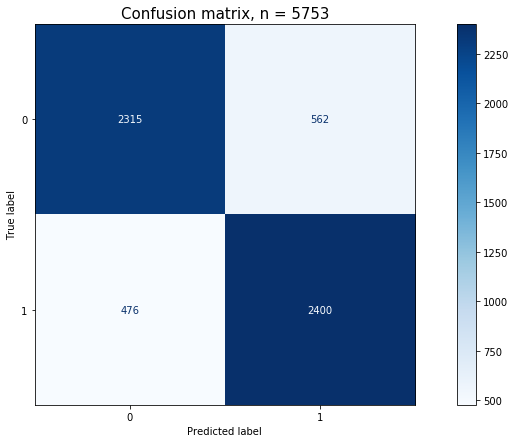

In [58]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model1, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

> > ### 4.1_2 Gradient Boost Model

---



In [102]:
model2 = XGBClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    learning_rate=0.1,
    n_jobs=-1
)

In [103]:
eval_set = [(X_train, y_train), 
            (X_test, y_test)]

In [ ]:
model2.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [105]:
y_test_pred = model2.predict(X_test)
print("model2_score:",model2.score(X_test,y_test))
print("model2_F1_score:",f1_score(y_test, y_test_pred))
print('model2_AUC score:',roc_auc_score(y_test, y_test_pred))
# model2의 지표가 model1보다 좋으므로, baseline model은 Gradient Boost Model인 model2이다.

model2_score: 0.8199200417173649
model2_F1_score: 0.8229059829059828
model2_AUC score: 0.8199229972691187


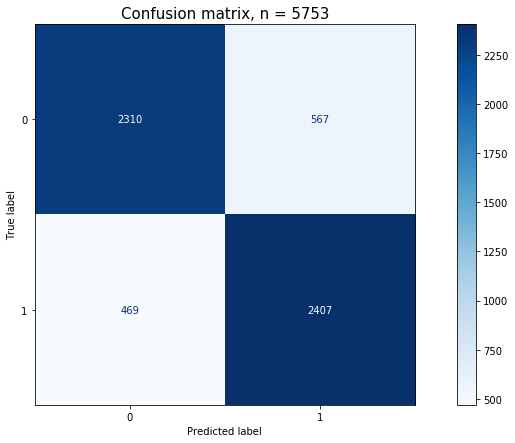

In [63]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model2, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

> ## 4.2 Hyperparameter Tuning_(Gradient Boost Model / Using RandomizedSearch)

In [65]:
model2.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [66]:
clf = XGBClassifier()

dists = {
        'silent': [False], # 동작 메시지를 프린트하지 않음
        'max_depth': randint(2,20), # 트리의 최대 깊이
        'learning_rate': [0.05, 0.1, 0.2, 0,3], # 학습률
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 데이터의 샘플링 비율
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 노드 depth 마다 사용할 칼럼(Feature)의 비율
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 트리 depth 마다 사용할 칼럼(Feature)의 비율
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], # 관측에서 요구되는 최소 가중치의 합 / over-fitting vs under-fitting을 조정하기 위한 파라미터
        'gamma': [0, 0.25, 0.5, 1.0], # 분할을 수행하는데 필요한 최소 손실 감소를 지정한다. / Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있다.(알고리즘을 보수적으로 만듬)
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], # 가중치에 대한 L2 정규화 용어
        'n_estimators': [100,200,300,400,500] # 모델 객체 지정
}

fit_dists = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 50,
              'eval_set': [(X_test, y_test_pred)]}

rs_clf = RandomizedSearchCV(clf, dists, n_iter=10, # n_iter : 파라미터 검색 횟수
                            n_jobs=-1, verbose=2, cv=10, # cv : 교차검증 시 fold 갯수
                            scoring='f1', refit=False, random_state=42)

In [67]:
# rs_clf.fit(X_train, y_train)
# best_score = rs_clf.best_score_
# best_params = rs_clf.best_params_
# print("Best score: ",best_score)
# print("Best params: ")
# for param_name in sorted(best_params.keys()):
#   print('%s: %r' % (param_name, best_params[param_name]))

In [68]:
#@title
# Best params: 
# colsample_bylevel: 1.0
# colsample_bytree: 0.5
# gamma: 1.0
# learning_rate: 0.05
# max_depth: 15
# min_child_weight: 1.0
# n_estimators: 500
# reg_lambda: 0.1
# silent: False
# subsample: 0.6

In [69]:
model2 = XGBClassifier(
    colsample_bylevel = 1.0,
    colsample_bytree = 0.5,
    gamma = 1.0,
    learning_rate = 0.05,
    max_depth = 15,
    min_child_weight = 1.0,
    n_estimators = 500,
    reg_lambda = 0.1,
    silent = False,
    subsample = 0.6,
    n_jobs=-1
)

In [70]:
eval_set2 = [(X_train, y_train),
             (X_test, y_test)]

In [71]:
model2.fit(X_train, y_train, 
          eval_set=eval_set2,
          eval_metric='error',
          early_stopping_rounds=50
         )

[0]	validation_0-error:0.233735	validation_1-error:0.273075
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.212134	validation_1-error:0.241961
[2]	validation_0-error:0.209918	validation_1-error:0.229793
[3]	validation_0-error:0.207093	validation_1-error:0.224405
[4]	validation_0-error:0.204398	validation_1-error:0.220754
[5]	validation_0-error:0.19023	validation_1-error:0.211716
[6]	validation_0-error:0.186145	validation_1-error:0.208239
[7]	validation_0-error:0.183624	validation_1-error:0.208413
[8]	validation_0-error:0.181625	validation_1-error:0.208587
[9]	validation_0-error:0.175975	validation_1-error:0.20511
[10]	validation_0-error:0.168065	validation_1-error:0.202677
[11]	validation_0-error:0.165631	validation_1-error:0.201112
[12]	validation_0-error:0.163719	validation_1-error:0.200591
[13]	validation_0-error:0.16424	validation_1-error:0.20267

XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.5, gamma=1.0,
              learning_rate=0.05, max_depth=15, min_child_weight=1.0,
              n_estimators=500, n_jobs=-1, reg_lambda=0.1, silent=False,
              subsample=0.6)

In [72]:
y_test_pred = model2.predict(X_test)
print("score:",model2.score(X_test,y_test))
print("F1_score:",f1_score(y_test, y_test_pred))
print('pipe_AUC score:',roc_auc_score(y_test, y_test_pred))

score: 0.8317399617590823
F1_score: 0.8336198006187693
pipe_AUC score: 0.8317419508131975


In [73]:
threshold = 0.5

y_pred_proba = model2.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba > threshold
  
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2877
           1       0.82      0.84      0.83      2876

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



In [74]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.998926
1,0.000000,0.000348,0.998926
2,0.000000,0.012170,0.994361
3,0.000000,0.012865,0.994333
4,0.000000,0.013213,0.994176
...,...,...,...
1539,0.965589,0.999305,0.015347
1540,0.965589,0.999652,0.015032
1541,0.965937,0.999652,0.015031
1542,0.965937,1.000000,0.014971


In [75]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('threshold:', optimal_threshold)

threshold: 0.50578755


In [76]:
threshold = optimal_threshold
y_pred_proba = model2.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba > threshold

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2877
           1       0.83      0.84      0.83      2876

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



In [77]:
y_test_pred = model2.predict(X_test)
print("score:",model2.score(X_test,y_test))
print("F1_score:",f1_score(y_test, y_test_pred))
print('pipe_AUC score:',roc_auc_score(y_test, y_test_pred))

score: 0.8317399617590823
F1_score: 0.8336198006187693
pipe_AUC score: 0.8317419508131975


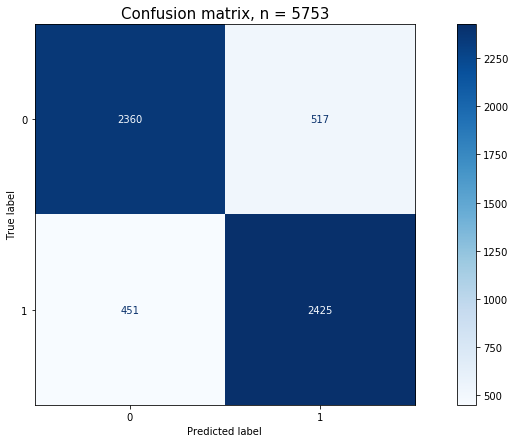

In [78]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model2, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

#5. Analyze

---

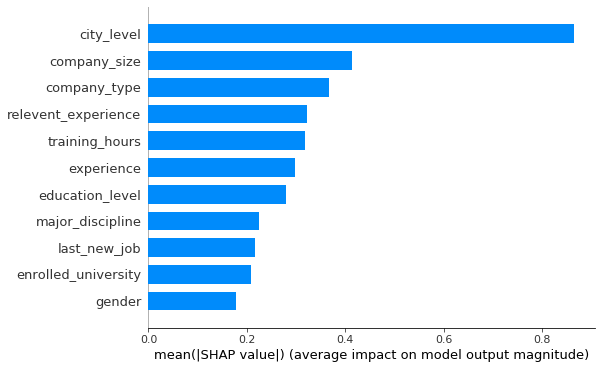

In [81]:
import shap
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test.iloc[:])
shap.summary_plot(shap_values, X_test.iloc[:], plot_type="bar")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


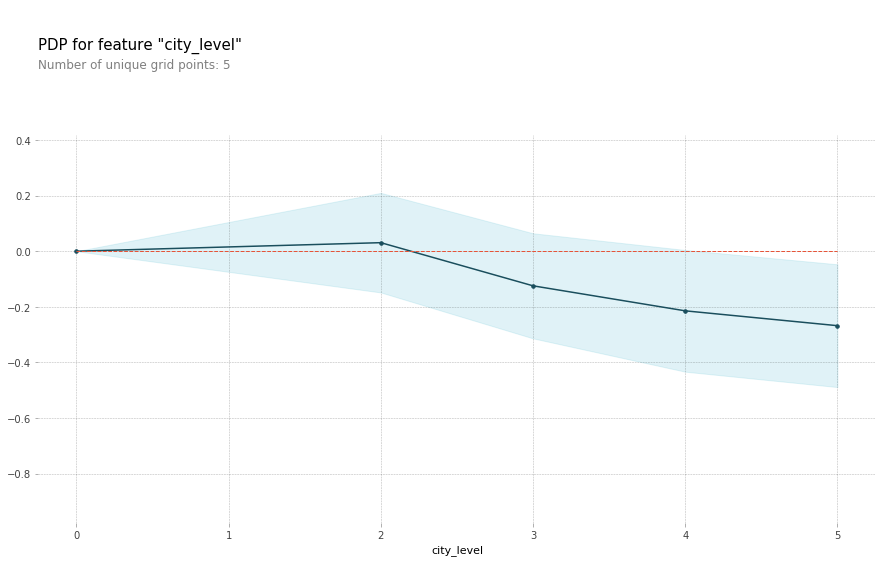

In [82]:
features = X_test.columns
feature = 'city_level'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

[0]	validation_0-error:0.266982	validation_1-error:0.266643
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.268938	validation_1-error:0.260907
[2]	validation_0-error:0.252075	validation_1-error:0.252912
[3]	validation_0-error:0.252249	validation_1-error:0.252216
[4]	validation_0-error:0.248859	validation_1-error:0.249261
[5]	validation_0-error:0.242557	validation_1-error:0.241439
[6]	validation_0-error:0.235256	validation_1-error:0.235182
[7]	validation_0-error:0.230953	validation_1-error:0.230836
[8]	validation_0-error:0.231388	validation_1-error:0.2324
[9]	validation_0-error:0.232387	validation_1-error:0.23327
[10]	validation_0-error:0.231431	validation_1-error:0.231879
[11]	validation_0-error:0.231909	validation_1-error:0.234139
[12]	validation_0-error:0.229823	validation_1-error:0.230836
[13]	validation_0-error:0.228389	validation_1-error:0.22718

<Figure size 864x864 with 0 Axes>

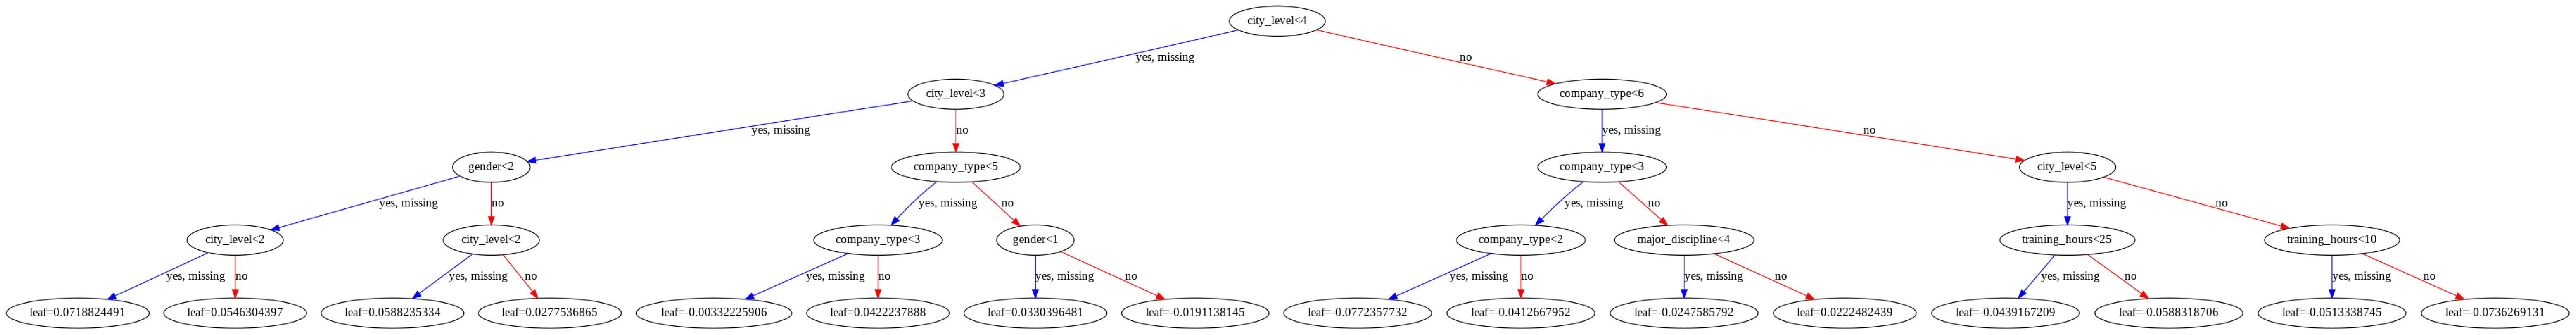

In [83]:
from xgboost import plot_tree 
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100,150

model3 = XGBClassifier(
    colsample_bylevel = 1.0,
    colsample_bytree = 0.5,
    gamma = 1.0,
    learning_rate = 0.05,
    max_depth = 4,
    min_child_weight = 1.0,
    n_estimators = 500,
    reg_lambda = 0.1,
    silent = False,
    subsample = 0.6,
    n_jobs=-1
)

model3.fit(X_train, y_train, 
          eval_set=eval_set2,
          eval_metric='error',
          early_stopping_rounds=50
         )

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model3)
plt.show()


In [84]:
train_raw.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [85]:
train_group = train.groupby('target').get_group(1.0)

In [86]:
train_raw_group = train_raw.groupby(['city','city_development_index'], as_index=False).size()
train_raw_group = train_raw_group.rename(columns={'size':'count'}).reset_index(drop=False)
train_raw_group = train_raw_group.rename(columns={'city_development_index':'CDI'}).reset_index(drop=False)
train_raw_group = train_raw_group.sort_values(by = 'count', ascending=False).head(20).loc[:,'city':]

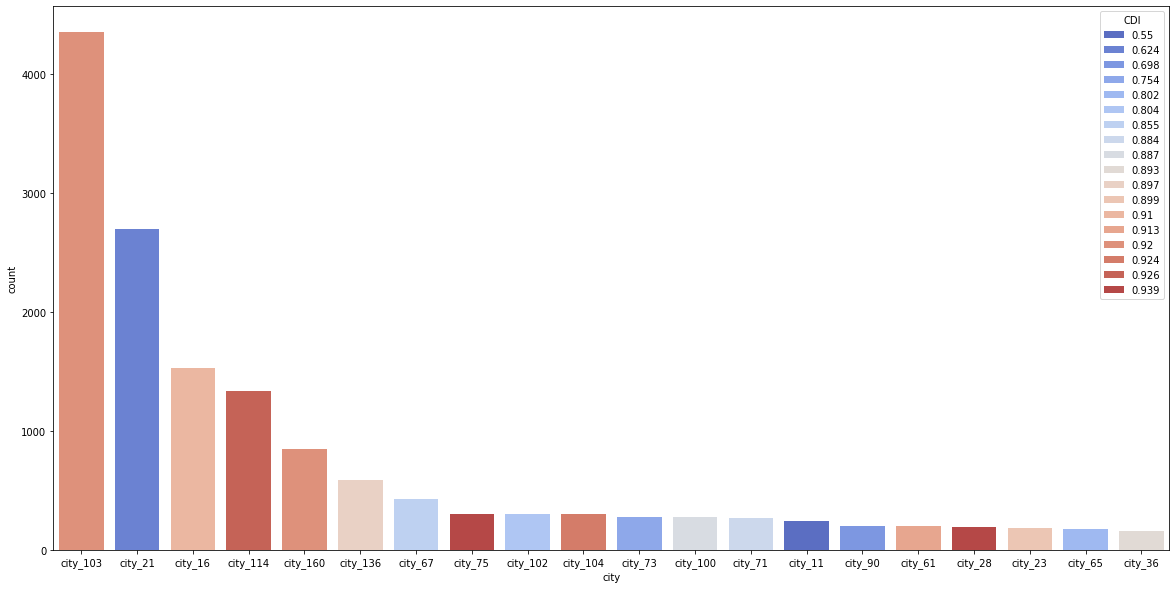

In [87]:
plt.figure(figsize = (20,10))
sns.barplot(data = train_raw_group, x = 'city', y = 'count', hue = 'CDI', palette=("coolwarm"), dodge=False)

In [88]:
train_raw_group2 = train_raw.groupby(['city','city_development_index','target'], as_index=False).size()
train_raw_group2 = train_raw_group2.rename(columns={'size':'count'})
train_raw_group2 = train_raw_group2.rename(columns={'city_development_index':'CDI'})
train_raw_group2 = train_raw_group2.sort_values(by = 'count', ascending=False).head(237).loc[:,'city':]

In [89]:
train_raw_group2.head()

,city,CDI,target,count
10,city_103,0.920,0.0,3427
124,city_21,0.624,1.0,1597
93,city_16,0.910,0.0,1354
25,city_114,0.926,0.0,1203
123,city_21,0.624,0.0,1105


In [90]:
train_raw_group.head(20).city

5      city_103
64      city_21
48      city_16
13     city_114
49     city_160
30     city_136
95      city_67
103     city_75
4      city_102
6      city_104
101     city_73
2      city_100
99      city_71
11      city_11
116     city_90
91      city_61
70      city_28
65      city_23
94      city_65
74      city_36
Name: city, dtype: object

In [91]:
train_raw_group2['sum'] = train_raw_group2.groupby('city')['count'].cumsum(axis=0)
train_raw_group2['norm_count'] = train_raw_group2.groupby('city')['count'].apply(lambda x : x/sum(x))

In [92]:
train_raw_group2.sort_values(by='CDI', ascending=False)

,city,CDI,target,count,sum,norm_count
234,city_98,0.949,1.0,8,79,0.101266
233,city_98,0.949,0.0,71,71,0.898734
200,city_75,0.939,1.0,31,305,0.101639
136,city_28,0.939,1.0,15,192,0.078125
135,city_28,0.939,0.0,177,177,0.921875
...,...,...,...,...,...,...
63,city_139,0.487,1.0,4,4,0.800000
43,city_126,0.479,0.0,13,28,0.464286
44,city_126,0.479,1.0,15,15,0.535714
142,city_33,0.448,1.0,11,11,0.647059


In [93]:
"city_103|city_21|city_16|city_114|city_160|city_136|city_67|city_75|city_102|city_104"#|city_73|city_100|city_71|city_11|city_90|city_61|city_28|city_23|city_65|city_36
train_raw_group2 = train_raw_group2.loc[train_raw_group2.city.str.contains("city_103|city_21|city_16|city_114|city_160|city_136|city_67|city_75|city_102|city_104", na=False)]

In [94]:
train_raw_group2

,city,CDI,target,count,sum,norm_count
10,city_103,0.920,0.0,3427,3427,0.786912
124,city_21,0.624,1.0,1597,1597,0.591044
93,city_16,0.910,0.0,1354,1354,0.883235
25,city_114,0.926,0.0,1203,1203,0.900449
123,city_21,0.624,0.0,1105,2702,0.408956
11,city_103,0.920,1.0,928,4355,0.213088
95,city_160,0.920,0.0,646,646,0.764497
58,city_136,0.897,0.0,525,525,0.895904
183,city_67,0.855,0.0,374,374,0.867749
199,city_75,0.939,0.0,274,274,0.898361


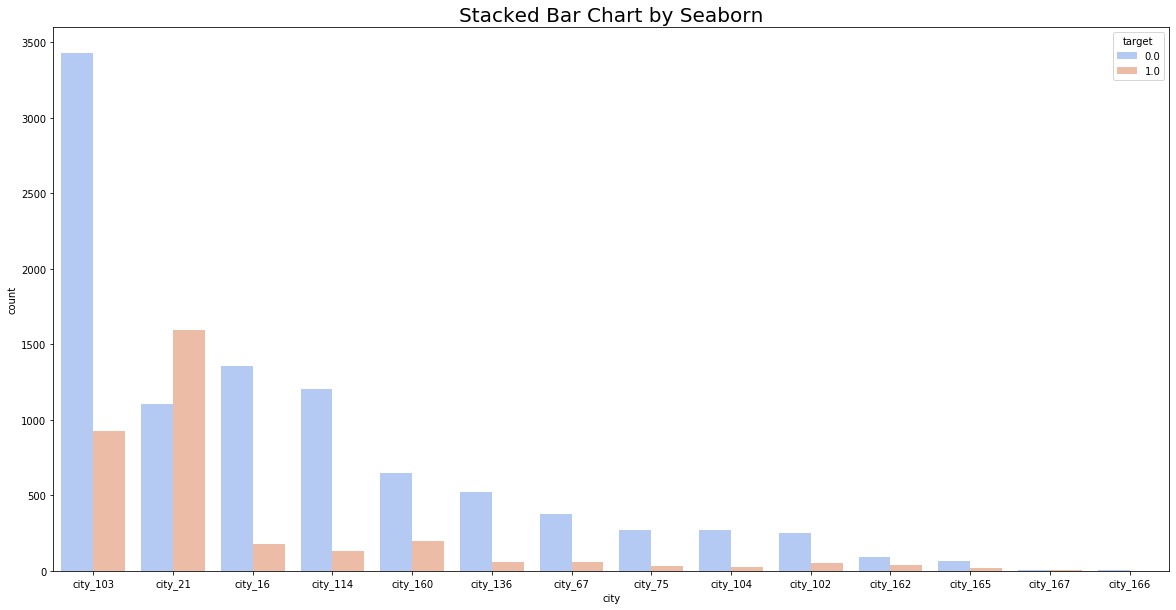

In [97]:
plt.figure(figsize = (20, 10))
sns.barplot(x='city', y='count', hue='target', palette = 'coolwarm', data=train_raw_group2)
plt.title('Stacked Bar Chart by Seaborn', fontsize='20')
plt.show()
